## Classification Metrics

In [68]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
data1=pd.read_csv('cancer.csv')

In [69]:
data1=data1.drop(['id'],axis=1)

In [70]:
data1.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [71]:
data1.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [72]:
data1['diagnosis'].replace(['M','B'],['Malignant','Benign'],inplace=True)

In [73]:
data1.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,Malignant,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Malignant,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [74]:
x=data1.iloc[:,1:31]
y=data1.iloc[:,0]

In [75]:
x.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [76]:
y.head(2)

0    Malignant
1    Malignant
Name: diagnosis, dtype: object

In [77]:
data1['diagnosis'].replace(['Malignant','Benign'],[1,0],inplace=True)

In [78]:
data1.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [36]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [79]:
x_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,14.49,33.37,92.04,653.6,0.1419,0.1523,0.2177,0.09331,0.2829,0.08067
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,15.93,30.25,102.50,787.9,0.1094,0.2043,0.2085,0.11120,0.2994,0.07146


In [80]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [82]:
x_test.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.70,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.1358,0.1507,0.1275,0.0875,0.2733,0.08022


In [83]:
y_test.head(2)

329    1
271    0
Name: diagnosis, dtype: int32

In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
#Predict on test data
y_pred=clf.predict(x_test)

In [44]:
print("Actual breast cancer : ")
print(y_test.values)

Actual breast cancer : 
[1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 1]


In [45]:
print("\nPredicted breast cancer : ")
print(y_pred)


Predicted breast cancer : 
[0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1]


In [49]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, precision_score

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))


Accuracy score: 92.105263


In [62]:
print("precision_score : %f" %(precision_score(y_test, y_pred) * 100))

precision_score : 97.435897


In [63]:
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))

Recall score : 82.608696


In [64]:
print(confusion_matrix(y_test, y_pred)) 

[[67  1]
 [ 8 38]]


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        68
           1       0.97      0.83      0.89        46

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.92      0.92       114



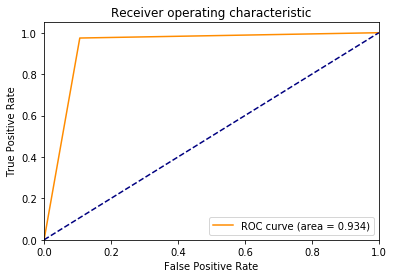

In [66]:
import matplotlib.pyplot as plt  
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

#plt.figure()
plt.plot(fpr, tpr, color='darkorange', 
         label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))

ROC score : 90.569054

